# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airbnb = pd.read_csv('./AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='neighbourhood_group'>

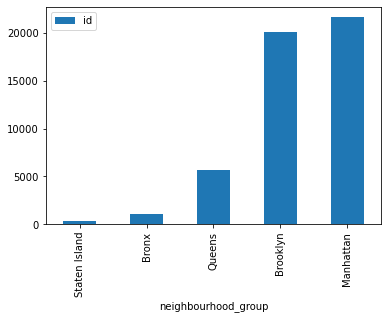

In [8]:
# How many neighborhood groups are available and which shows up the most?

groupCount = airbnb.groupby('neighbourhood_group', as_index=False).count().sort_values('id', ascending=True)
groupCount.plot.bar('neighbourhood_group', 'id')

# 5 Groups, Bronx, Brooklyn, Manhattan, Queens, and Staten Island
# Manhattan shows up the most, closely followed by Brooklyn

<AxesSubplot:xlabel='room_type'>

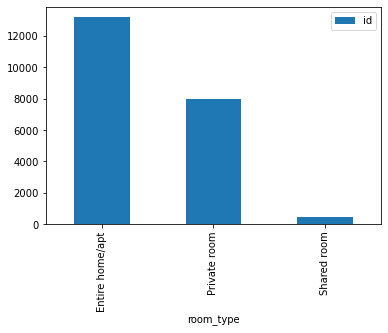

In [9]:
# Are private rooms the most popular in manhattan?
privateRooms = airbnb[airbnb['neighbourhood_group'] == "Manhattan"].groupby("room_type", as_index=False).count()
privateRooms.plot.bar('room_type', 'id')

# No, entire home/apt is, followed by private rooms, followed by shared rooms


In [14]:
# Which hosts are the busiest and based on their reviews?
busy = airbnb.groupby('host_id').sum().sort_values('reviews_per_month', ascending=False)
busy.head()

# 219517861, 244361589, 232251881, 26432133, 137274917
# Sonder(NYC), Row (NYC), Lakshmee, Danielle, David

# airbnb[airbnb['host_id'] == 219517861]['host_name']
# airbnb[airbnb['host_id'] == 244361589]['host_name']
# airbnb[airbnb['host_id'] == 232251881]['host_name']
# airbnb[airbnb['host_id'] == 26432133]['host_name']
# airbnb[airbnb['host_id'] == 137274917]['host_name']



,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,
219517861,10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588
244361589,294108503,366.82627,-665.89623,1845,9,305,111.72,81,2633
232251881,254974885,325.33942,-590.27250,403,8,482,80.63,64,1369
26432133,74542317,203.81845,-369.35591,236,5,2017,68.02,25,1443
137274917,345517389,489.12293,-887.88925,1320,12,607,62.89,144,2827


In [54]:
#Which neighorhood group has the highest average price?
navgprice = airbnb.groupby("neighbourhood_group").mean()['price'].sort_values(ascending=False)
navgprice

# Manhattan, $196.87/night


neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

In [55]:
# Which neighbor hood group has the highest total price?
hightotalprice = airbnb.groupby("neighbourhood_group").sum()['price'].sort_values(ascending=False)
hightotalprice

# Manhattan, total $4,264,527


neighbourhood_group
Manhattan        4264527
Brooklyn         2500600
Queens            563867
Bronx              95459
Staten Island      42825
Name: price, dtype: int64

In [24]:
#Which top 5 hosts have the highest total price?
topPriceHosts = airbnb.groupby("host_id").sum()['price'].sort_values(ascending=False)
print(topPriceHosts)

topHosts = [219517861, 107434423, 156158778, 205031545, 30283594]
for host in topHosts:
    print(airbnb[airbnb['host_id'] == host]['host_name'].head(1))

# Sonder(NYC), Blueground, Sally, Red Awning, Kara
    
# airbnb[airbnb['host_id']==107434423]['host_name']
# airbnb[airbnb['host_id']==156158778]['host_name']
# airbnb[airbnb['host_id']==205031545]['host_name']
# airbnb[airbnb['host_id']==30283594]['host_name']

host_id
219517861    82795
107434423    70331
156158778    37097
205031545    35294
30283594     33581
             ...  
205820814       10
180661875       10
11967922        10
10132166         0
13709292         0
Name: price, Length: 37457, dtype: int64
38293    Sonder (NYC)
Name: host_name, dtype: object
26137    Blueground
Name: host_name, dtype: object
29661    Sally
Name: host_name, dtype: object
34332    Red Awning
Name: host_name, dtype: object
9740    Kara
Name: host_name, dtype: object


In [16]:
# Who currently has no (zero) availability with a review count of 100 or more?
notAvailable = airbnb[(airbnb['availability_365'] == 0) & (airbnb['number_of_reviews'] >= 100)]
notAvailable



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0


In [19]:
# What host has the highest total of prices and where are they located?
hightotalpricehost = airbnb.groupby("host_id").sum().sort_values('price', ascending=False)
hightotalpricehost.head(1)
airbnb[airbnb['host_id'] == 219517861]

# Sonder (NYC), Manhattan



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


In [23]:
# When did Danielle from Queens last receive a review?
danielle = airbnb[(airbnb['host_name'] == "Danielle") & (airbnb['neighbourhood_group'] == 'Queens')].sort_values('last_review', ascending=False)
danielle

# It seems there are multiple Danielles from Queens, but the one with the most recent review is
# host_id 26432133 with a recent review at 2019-07-08


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0


## Further Questions

1. Which host has the most listings?

In [28]:
mosthost = airbnb.groupby('host_id').count()['id'].sort_values(ascending=False).head()
mosthost

# airbnb[airbnb['host_id'] == 219517861]
# Sonder (NYC)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: id, dtype: int64

2. How many listings have completely open availability?

In [31]:
totallyOpen = airbnb[airbnb['availability_365'] == 365]
totallyOpen
# 1295

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48744,36415840,A BEAUTIFUL SPACE IN HEART OF WILLIAMSBURG,223715460,Simon And Julian,Brooklyn,Williamsburg,40.71091,-73.96560,Entire home/apt,499,30,0,NaN,NaN,1,365
48844,36453952,West Village Studio on quiet cobblestone street,115491896,Will,Manhattan,West Village,40.73620,-74.00827,Entire home/apt,205,1,0,NaN,NaN,1,365
48868,36473253,Heaven for you(only for guy),261338177,Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,NaN,NaN,6,365
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365


3. What room_types have the highest review numbers?

In [4]:
rooms = airbnb.groupby('room_type').mean()['reviews_per_month']
rooms

# Shared rooms

room_type
Entire home/apt    1.306578
Private room       1.445209
Shared room        1.471726
Name: reviews_per_month, dtype: float64

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
5, Manhattan
3. Are private rooms the most popular in manhattan?
No. Entire home/apt > private > shared
4. Which hosts are the busiest and based on their reviews?
Based on total reviews per month: Sonder(NYC), Row (NYC), Lakshmee, Danielle, David
5. Which neighorhood group has the highest average price?
Manhattan, $196.87/night
6. Which neighborhood group has the highest total price?
Manhattan, total $4,264,527
7. Which top 5 hosts have the highest total price?
Sonder(NYC), Blueground, Sally, Red Awning, Kara
8. Who currently has no (zero) availability with a review count of 100 or more?
162 hosts, see relevant cell.
9. What host has the highest total of prices and where are they located?
Sonder (NYC), Manhattan, $82795
10. When did Danielle from Queens last receive a review?
It seems there are multiple Danielles from Queens, but the one with the most recent review is
host_id 26432133 with a recent review at 2019-07-08
Also, if you uncovered some more details that were not asked above, please discribe them here.

Queens, The Bronx, and Staten Island have disproportionately lower listings compared to their populations.